# Getting Started

In [35]:
from GaiaAlertsPy import alert as gaap

import numpy as np
from astropy.stats import sigma_clip
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams['savefig.dpi'] = 550
rcParams['font.size'] = 20
plt.rc('font', family='serif')

# fancy plotting 
import seaborn as sns
pal = sns.color_palette('magma', 80)
hex_colors = pal.as_hex()

### Query all Gaia Photometric Science Alerts to Date

In [6]:
table = gaap.all_sources() # query and download all Gaia Photometric Science Alerts

In [5]:
table

Name,Date,RaDeg,DecDeg,AlertMag,HistoricMag,HistoricStdDev,Class,Published,Comment,TNSid
str9,str19,float64,float64,float64,float64,float64,str14,str19,str130,str10
Gaia24byo,2024-07-21 08:45:07,189.20586,6.84128,18.44,--,--,unknown,2024-07-24 21:12:16,candidate SN near galaxy WISEA J123649.31+065027.9,AT2024poq
Gaia24byn,2024-07-21 00:34:35,32.8506,46.70412,18.3,--,--,unknown,2024-07-24 21:11:26,Apparently hostless transient,AT2024knb
Gaia24bym,2024-07-21 20:00:19,211.39828,-39.20317,18.48,--,--,SN,2024-07-24 21:10:36,confirmed SN in galaxy IC 4367,SN2024pfc
Gaia24byl,2024-07-21 13:37:09,233.02488,-60.3525,18.7,--,--,unknown,2024-07-24 21:09:46,blue transient in the galactic plane,AT2024qah
Gaia24byk,2024-07-21 15:21:38,172.17452,42.52083,18.86,19.34,0.11,QSO,2024-07-24 21:08:56,slow brightening in known QSO,AT2024qag
Gaia24byj,2024-07-21 05:07:36,23.56687,30.61165,17.47,17.97,0.15,unknown,2024-07-24 21:08:06,Brightening in Gaia and GALEX source,AT2020aafy
Gaia24byi,2024-07-21 19:29:51,248.02041,-64.88373,18.72,19.48,0.21,unknown,2024-07-24 21:07:04,Brightening of a Gaia and WISE source,AT2024qaf
Gaia24byh,2024-07-20 18:07:05,1.79692,-19.91794,18.94,19.28,0.09,unknown,2024-07-24 11:49:06,Brightening in Gaia and Wise source,AT2024pzq
Gaia24byg,2024-07-20 22:53:27,29.21525,42.50217,17.41,20.28,0.15,unknown,2024-07-24 11:43:54,2.5 mag brightening in candidate CV TCP J01565167+4230076,AT2024moh


### Sky Distribution of Alerts

Text(0, 0.5, 'DEC [deg]')

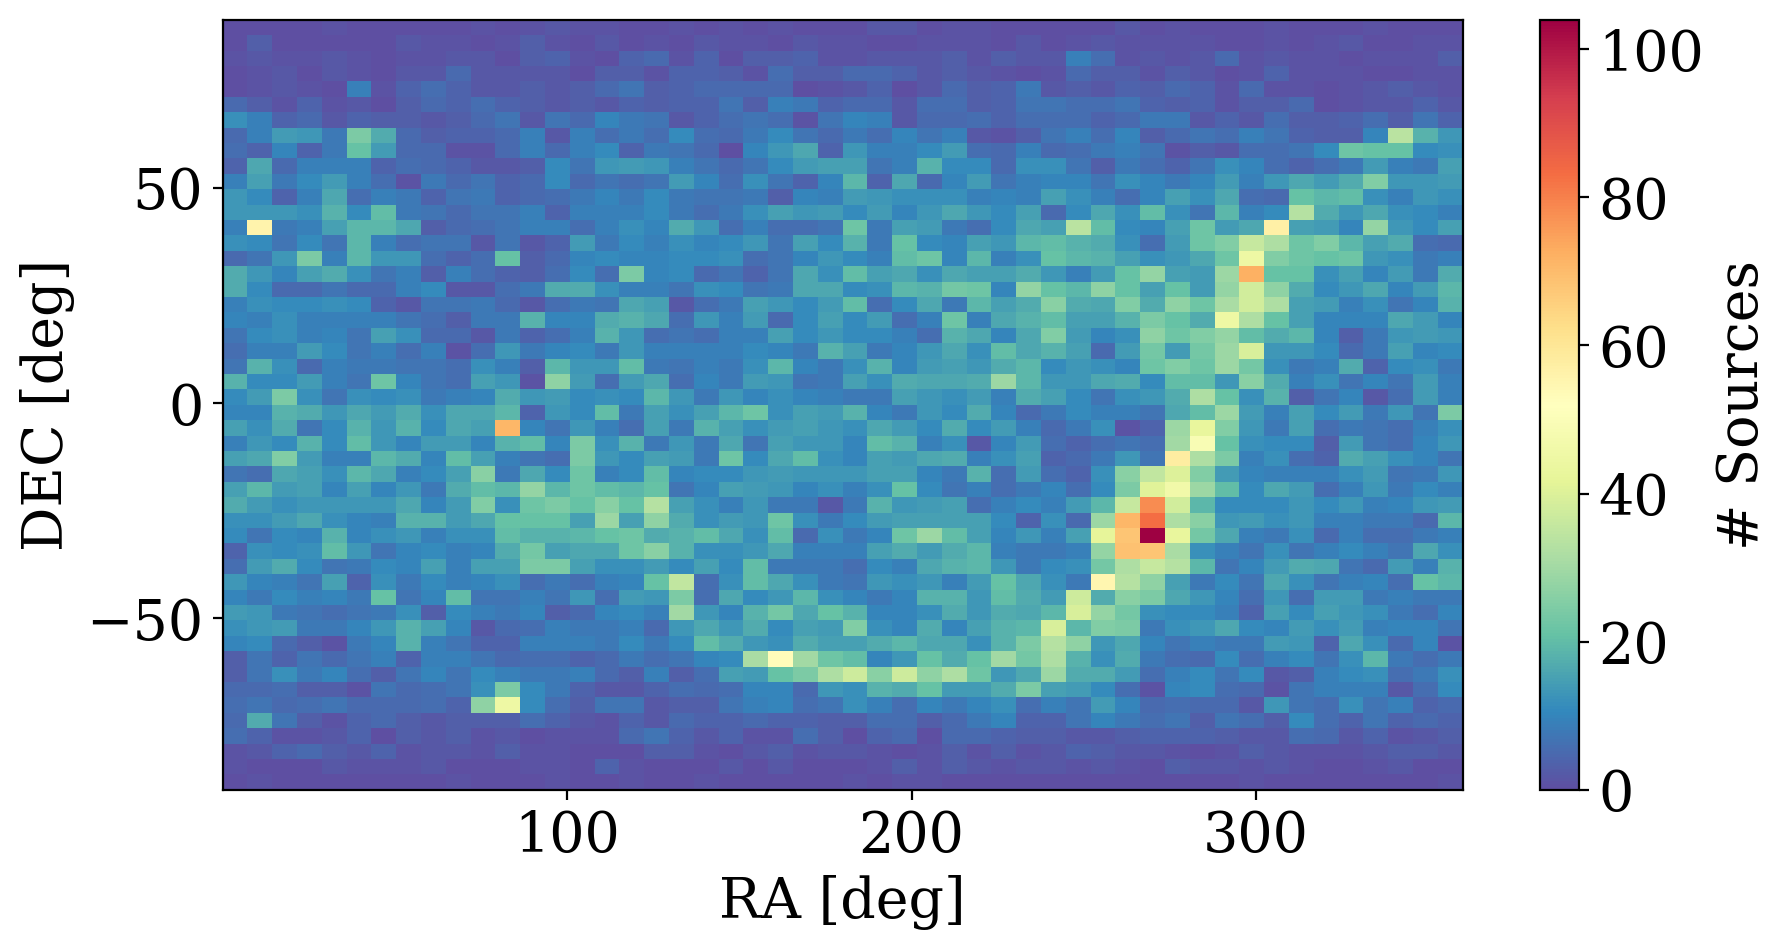

In [6]:
plt.figure(figsize=(10,5))
_ = plt.hist2d(table['RaDeg'], table['DecDeg'], bins=(50, 50), cmap='Spectral_r')
plt.colorbar(label='# Sources')
plt.xlabel("RA [deg]")
plt.ylabel("DEC [deg]")

### Histogram of All Alert Magnitudes

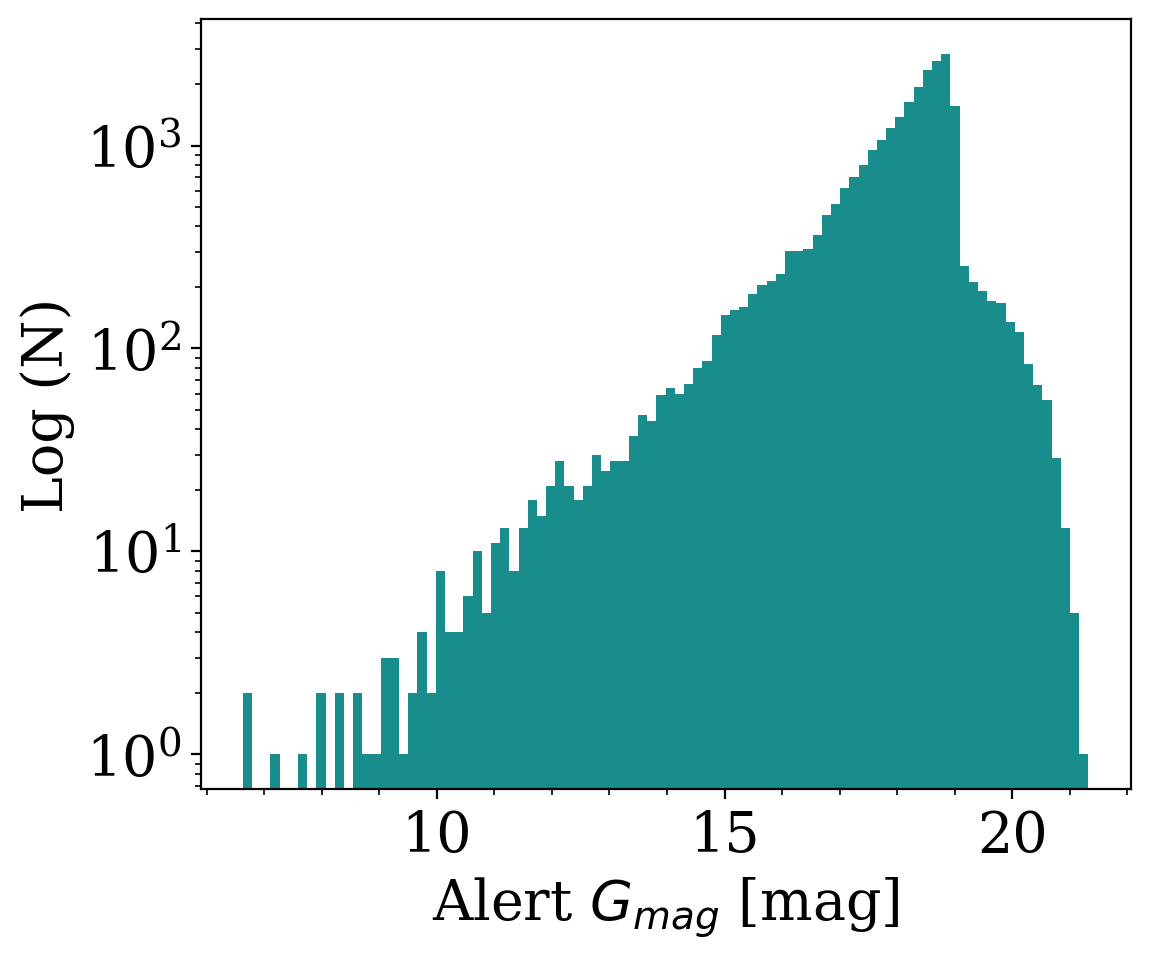

In [11]:
plt.figure(figsize=(6,5))
_ = plt.hist(table['AlertMag'], histtype='stepfilled', color='teal', bins='scott', alpha=0.9)
plt.yscale('log')
plt.ylabel("Log (N)")
plt.xlabel("Alert $G_{mag}$ [mag]")
plt.minorticks_on()

## Getting Started with Alert Light Cuves

In this short tutorial you will learn how to use `GaiaAlertsPy` and query the alert light curves. Once you query a Gaia Alerts, it will return a `astropy.Table` containing the epochal photometry.

In [7]:
target_id = "Gaia22eoa" 
alert_lc = gaap.GaiaAlert(target_id).query_lightcurve_alert()

In [16]:
# view first 5 alerts
alert_lc[0:5]

JD,mag_G,mag_G_error
float64,float64,float64
2457107.4551157407,16.7,0.015068630569774477
2457131.1310416665,16.89,0.01568925719710279
2457268.409351852,16.81,0.015420801849645116
2457298.7162152776,17.0,0.016077223994238388
2457319.6403819444,16.98,0.016004964926408682


The photometric uncertainties are calculated using the following equation and are valid for 13<G<21:

$$\begin{equation} \sigma_{mag_{G}} = 3.43779 - (G/1.13759) + (G/3.44123)^2 - (G/6.51996)^3 + (G/11.45922)^4 \end{equation}$$

For more information please see [Gaia Early Data Release 3. Gaia photometric science alerts](https://ui.adsabs.harvard.edu/abs/2021A%26A...652A..76H/abstract).

Let's plot the light curve of this interesting Young Stellar Object:

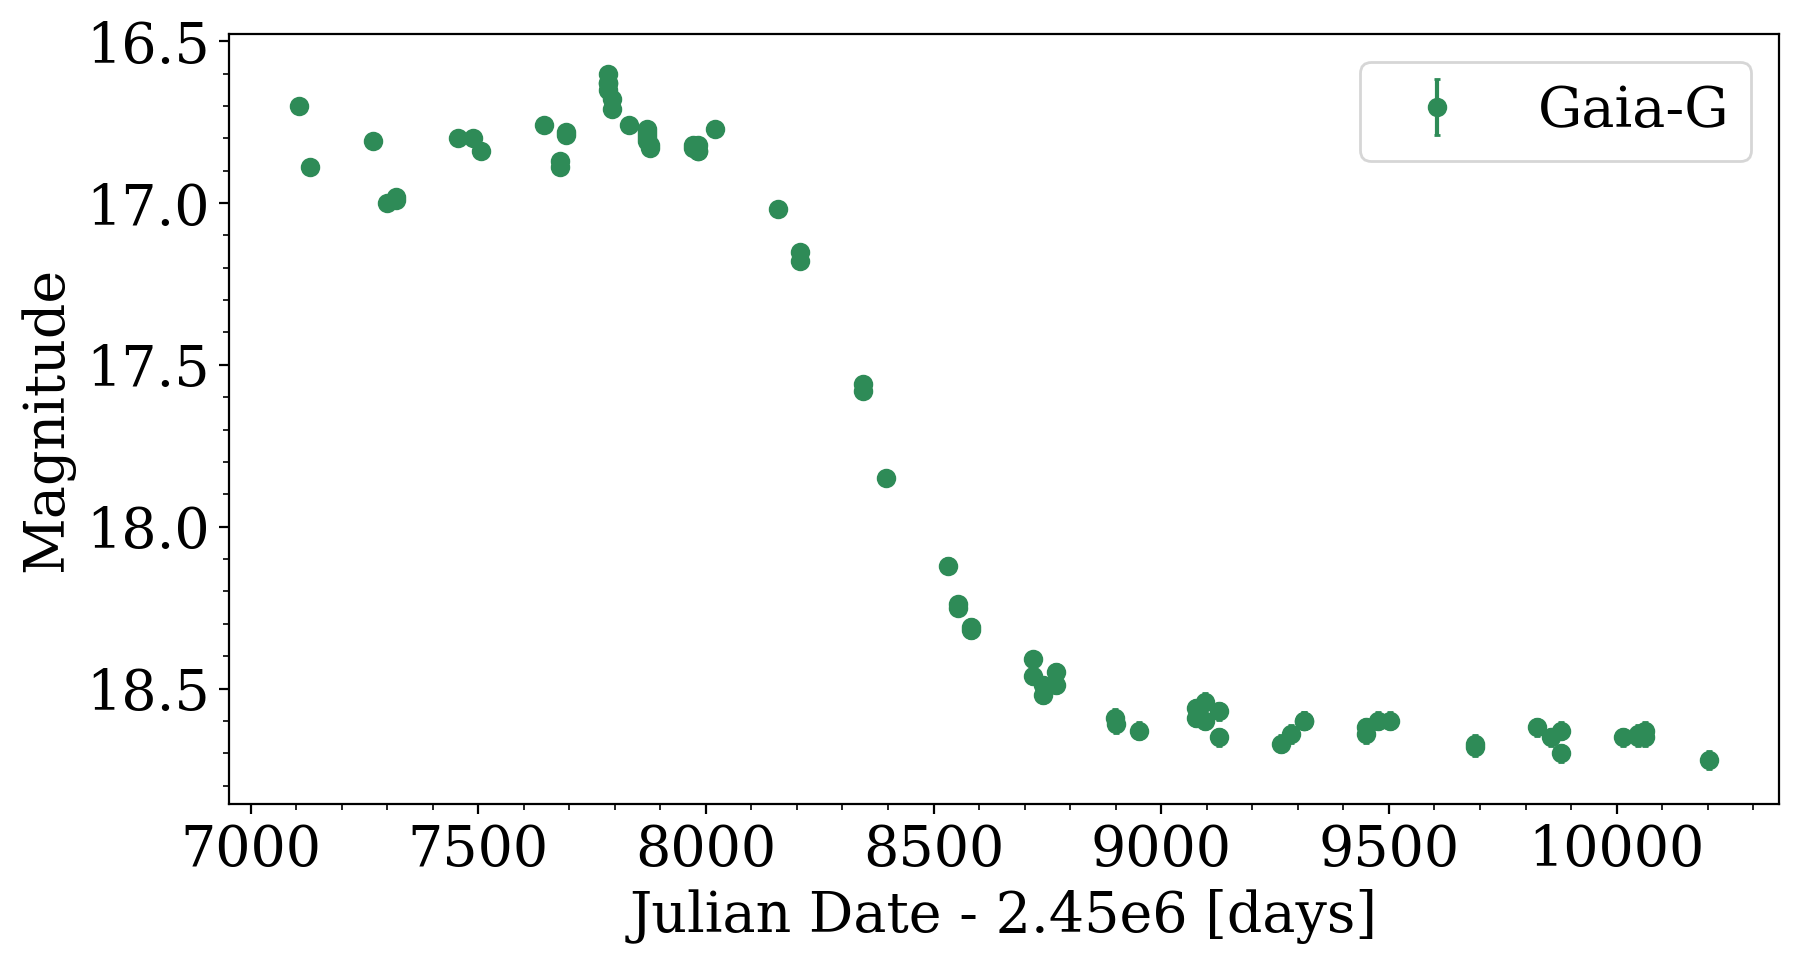

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.errorbar(alert_lc['JD']-2.45e6, alert_lc['mag_G'], alert_lc['mag_G_error'], fmt='o', capsize=1, color='seagreen', 
label='Gaia-G')
ax.legend()
ax.set_ylim(ax.set_ylim()[::-1])
ax.set_xlabel("Julian Date - 2.45e6 [days]")
ax.set_ylabel("Magnitude")
plt.minorticks_on()

## Accessing the BP-RP Low-Res. Spectra


For the moment we suggest that the spectra for each band is summed and the zero-point for each filter to be applied when converting from the raw ADU to the AB magnitude system. Further investigation will examine the calibration between standard stars and calibrating the ADU spectra to more reliable zero-point estimations and other systematics.

 > Warning -- this is a very crude estimate to convert the BP/RP spectra to BP/RP magnitudes. More tutorials and methods for calibration will come soon!

Let's first fetch all the BP/RP photometry:

In [9]:
# Now we can even query the BP_RP information
color_lc = gaap.GaiaAlert(target_id).query_bprp_history()

In [11]:
color_lc[0:5]

Date,JD,Average Mag.,order,bp,rp,Name
str19,float64,float64,int64,float64[60],float64[60],str9
2015-03-25 22:55:22,2457107.46,16.7,0,0.0 .. 14.0,0.019 .. -2.419,Gaia22eoa
2015-04-18 15:08:42,2457131.13,16.89,1,1.2061 .. -0.2061,0.2057 .. -5.2057,Gaia22eoa
2015-09-02 21:49:29,2457268.41,16.81,2,1.9246 .. -2.3246,0.5859 .. -1.3859,Gaia22eoa
2015-10-03 05:11:22,2457298.72,17.0,3,2.9471 .. -0.5471,0.238 .. -3.038,Gaia22eoa
2015-10-24 03:22:10,2457319.64,16.98,4,-1.6875 .. 8.0875,-1.029 .. -4.771,Gaia22eoa


Now we can estimate a **very** approximate magnitude for each bp/rp spectrum using the instrumental zero-point values: 

In [29]:
# Instrumental zero-point values
zp_BP, zp_RP = 25.3514, 24.7619 # Table 5.2 (https://gea.esac.esa.int/archive/documentation/GDR2/Data_processing/chap_cu5pho/sec_cu5pho_calibr/ssec_cu5pho_calibr_extern.html)

bp_mag, rp_mag = [], []
for _lc in color_lc:
    bp0, rp0 = _lc['bp'], _lc['rp']

    # Count only positive ADU counts & apply 5-sigma clip (see Hodgkin et al. 2021; Section 3.6)
    bp, rp = sigma_clip(bp0[bp0>0], sigma=5), sigma_clip(rp0[rp0>0], sigma=5)
    
    # Convert total flux to magnitudes
    bp_mag.append(-2.5*np.log10(bp.sum()) + zp_BP)
    rp_mag.append(-2.5*np.log10(rp.sum()) + zp_RP)

### Time Series BP RP Spectra

Alternatively, we can also fetch the raw ADU spectra that are reported on the GSA website. Same drill as before. These spectra are **not** calibrated - however some crude clolors can be extracted if you know the SED if your soruce.

Supposed we wanted to see the overall change in the low-res BP/RP spectra as a function of time and Gaia G magnitude. We can make a nice visualization combining the epochal BP/RP spectra including the average G band magnitude. From the plot below, we can see how for this particular souce that its spectrum is mostly red! 

Please see the epochal BP/RP tutorial for more details!

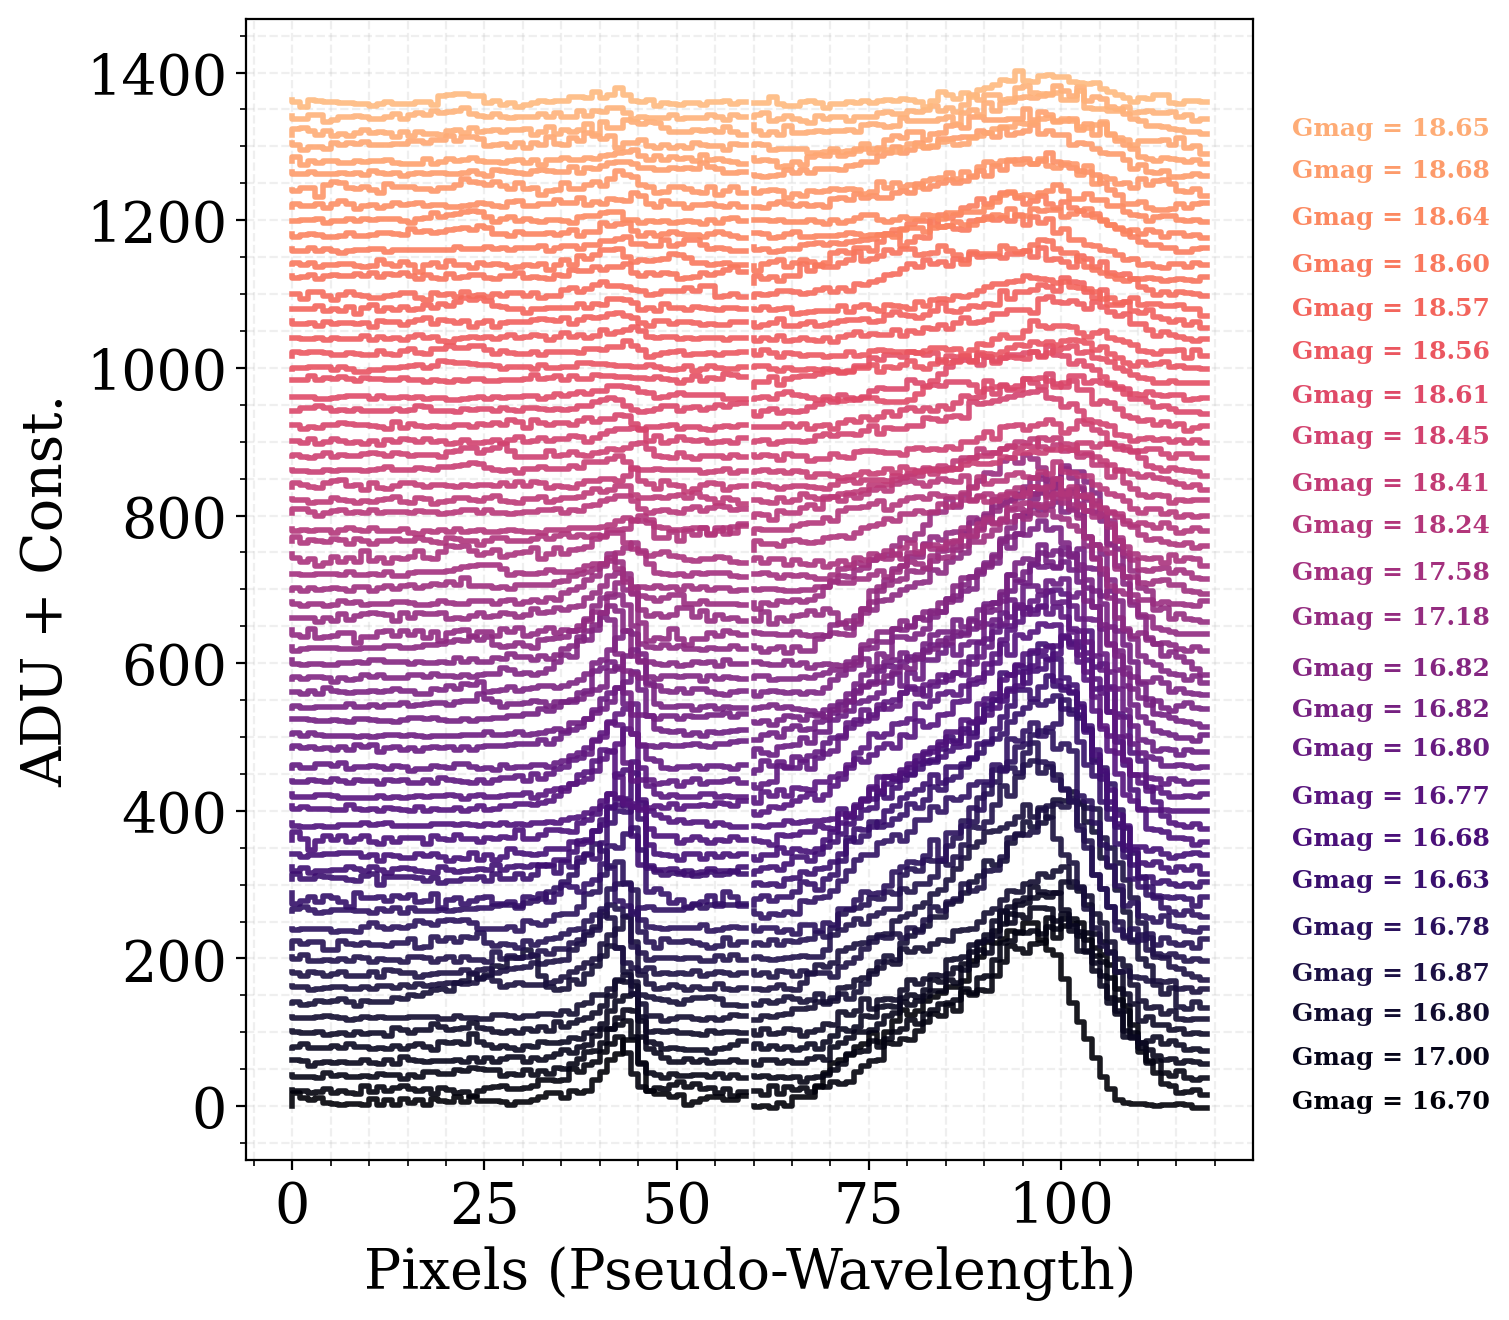

In [36]:
plt.figure(figsize=(8, 7))

# Plotting each color light curve
for i, c in enumerate(color_lc):
    offset = i * 20
    color = hex_colors[i % len(hex_colors)]
    
    # Plot BP and RP light curves with offset
    plt.step(range(0, 60), c['bp'] + offset, color=color, alpha=0.9, lw=2)
    plt.step(range(60, 120), c['rp'] + offset, color=color, alpha=0.9, lw=2)
    
    # Annotate with average magnitude every third curve
    if i % 3 == 0:
        plt.text(130, np.min(c['rp']) + offset, f"Gmag = {c['Average Mag.']:.2f}", fontsize=9, color=color, weight='bold')

# Labels and grid
plt.ylabel("ADU + Const.")
plt.xlabel("Pixels (Pseudo-Wavelength)")
plt.minorticks_on()
plt.grid(which='both', linestyle='--', alpha=0.2)

plt.tight_layout()

Using the extrapolated BP/RP colors we can now plot the BP and RP light curves to see if our object of interest has any color evolution:

Text(0, 0.5, 'Apparent Mag.')

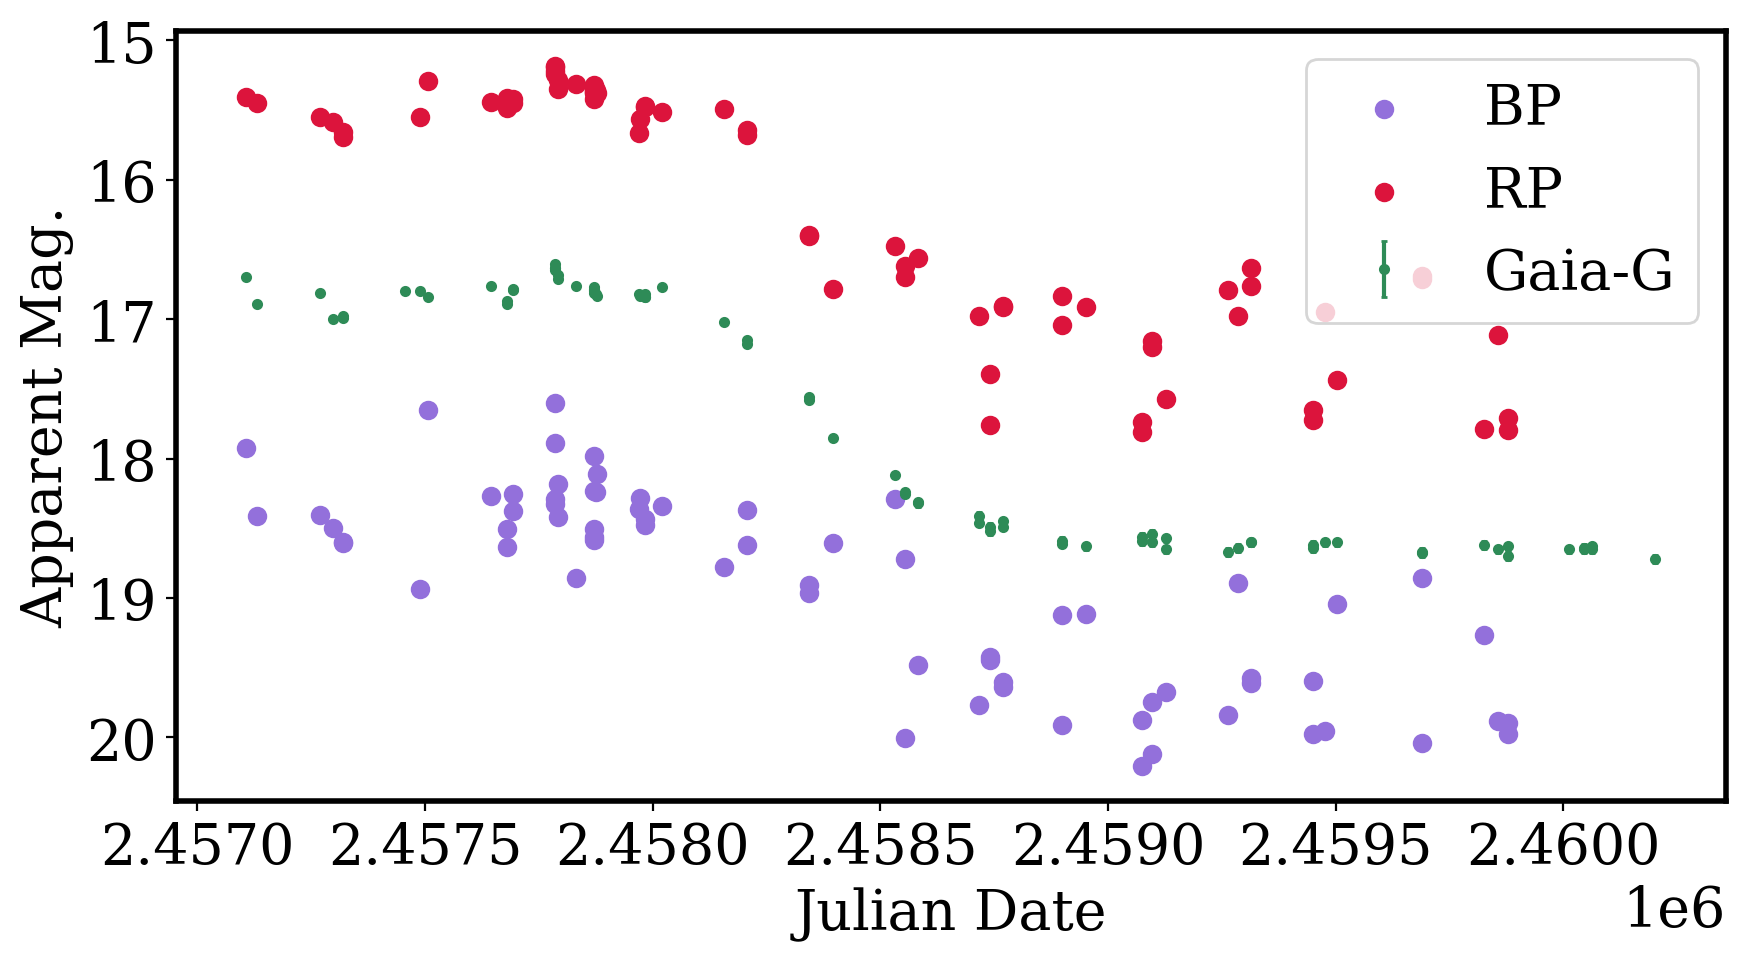

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.errorbar(alert_lc['JD'], alert_lc['mag_G'], alert_lc['mag_G_error'], fmt='.', capsize=1, color='seagreen', 
label='Gaia-G')
ax.scatter(color_lc['JD'], bp_mag, color='mediumpurple', label='BP')
ax.scatter(color_lc['JD'], rp_mag, color='crimson', label='RP')
ax.legend()
ax.set_ylim(ax.set_ylim()[::-1])
ax.set_xlabel("Julian Date")
ax.set_ylabel("Apparent Mag.")